<a href="https://colab.research.google.com/github/AdrianGuel/ExploringNonLinearParIdentification/blob/main/Testingpysindy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pysindy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 20.4 MB/s 


(x)' = 0.995 y
(y)' = -0.659 1 + -2.954 x + -0.191 y + 0.867 x^2 + 0.101 x y


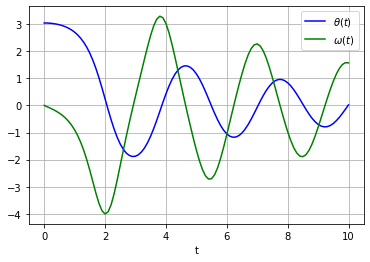

In [ ]:
import numpy as np
import pysindy as ps
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def pend(y, t, b, c):
    return np.array([y[1], -b*y[1] - c*np.sin(y[0])])

b = 0.25
c = 5.0
y0 = np.array([np.pi - 0.1, 0.0])
t = np.linspace(0, 10, 101)

sol = odeint(pend, y0, t, args=(b, c))

model = ps.SINDy(feature_names=["x", "y"])
model.fit(sol, t=t)

model.print()

plt.plot(t, sol[:, 0], 'b', label=r'$\theta(t)$')
plt.plot(t, sol[:, 1], 'g', label=r'$\omega(t)$')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

https://pysindy.readthedocs.io/en/latest/examples/3_original_paper.html#simple-illustrative-systems 